In [ ]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d utkarshx27/global-poverty-and-inequality-dataset

  0% 0.00/3.51M [00:00<?, ?B/s]
100% 3.51M/3.51M [00:00<00:00, 148MB/s]


In [ ]:
!unzip global-poverty-and-inequality-dataset.zip

Archive:  global-poverty-and-inequality-dataset.zip
  inflating: pip_codebook.csv        
  inflating: pip_dataset.csv         


In [ ]:
data=pd.read_csv('pip_dataset.csv')
# data2=pd.read_csv('pip_codebook.csv')

In [ ]:
# GSDP_data=GSDP_data.drop(['Unnamed: 37'], axis=1)
# data.info()
data.shape[0]
data.shape[1]
data.head()
# data.reporting_level.value_counts()

,country,year,reporting_level,welfare_type,ppp_version,survey_year,survey_comparability,headcount_ratio_international_povline,headcount_ratio_lower_mid_income_povline,headcount_ratio_upper_mid_income_povline,...,decile8_thr,decile9_thr,gini,mld,polarization,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,1996,national,consumption,2011,1996.0,0.0,0.920669,11.174149,44.618417,...,8.85,10.92,0.270103,0.119104,0.241293,0.928335,3.945872,3.568627,1.889273,1.888889
1,Albania,2002,national,consumption,2011,2002.0,1.0,1.570843,14.132118,49.669635,...,8.83,11.58,0.317390,0.164812,0.268982,1.215056,4.831625,3.979381,2.090253,1.903780
2,Albania,2005,national,consumption,2011,2005.0,1.0,0.860527,8.715685,38.545254,...,10.02,12.78,0.305957,0.154413,0.254529,1.142718,4.662236,3.872727,1.978328,1.957576
3,Albania,2008,national,consumption,2011,2008.0,1.0,0.313650,5.250542,31.110345,...,10.74,13.62,0.299847,0.148893,0.247311,1.114657,4.395911,3.574803,1.956897,1.826772
4,Albania,2012,national,consumption,2011,2012.0,1.0,0.849754,6.182414,34.528906,...,10.52,13.26,0.289605,0.138417,0.249988,1.041193,4.272573,3.632877,1.941435,1.871233


In [ ]:
one_hot_encode_cols = data.dtypes[data.dtypes == np.object]  # filtering by string categoricals(one with object type entry, for one hot encoding)
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  #List of relevant columns

data[one_hot_encode_cols].head().T

<ipython-input-8-87efc9f9d014>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  one_hot_encode_cols = data.dtypes[data.dtypes == np.object]  # filtering by string categoricals(one with object type entry, for one hot encoding)


,0,1,2,3,4
country,Albania,Albania,Albania,Albania,Albania
reporting_level,national,national,national,national,national
welfare_type,consumption,consumption,consumption,consumption,consumption


In [ ]:
# One hot encoding
df = pd.get_dummies(data, columns=one_hot_encode_cols, drop_first=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4877.0,2005.759893,9.438782,1967.0,2000.000000,2007.000000,2013.000000,2021.000000
ppp_version,4877.0,2013.999385,3.000308,2011.0,2011.000000,2011.000000,2017.000000,2017.000000
survey_year,4411.0,2005.939896,9.497211,1967.0,2000.000000,2007.000000,2014.000000,2021.000000
survey_comparability,4411.0,1.639084,1.402898,0.0,1.000000,1.000000,2.000000,6.000000
headcount_ratio_international_povline,4877.0,11.081565,18.190433,0.0,0.278387,2.041412,13.390963,96.871427
...,...,...,...,...,...,...,...,...
country_Zambia,4877.0,0.003691,0.060646,0.0,0.000000,0.000000,0.000000,1.000000
country_Zimbabwe,4877.0,0.001230,0.035057,0.0,0.000000,0.000000,0.000000,1.000000
reporting_level_rural,4877.0,0.025836,0.158661,0.0,0.000000,0.000000,0.000000,1.000000
reporting_level_urban,4877.0,0.048390,0.214612,0.0,0.000000,0.000000,0.000000,1.000000


In [ ]:
# Create a list of float colums to check for skewing(unsymmetric data points)
import numpy as np
mask = data.dtypes == np.float #Filtering columns with float entries for data skewing
float_cols = data.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[float_cols].skew()

<ipython-input-23-9d3601c6fe30>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = data.dtypes == np.float #Filtering columns with float entries for data skewing


In [ ]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
p50_p10_ratio,65.974202
p90_p10_ratio,63.038908
total_shortfall_40_median,7.489847
total_shortfall_100,7.278213
headcount_40_median,7.259834
...,...
decile6_share,-1.060581
decile7_share,-1.304461
headcount_ratio_3000,-1.306495
decile8_share,-1.359322


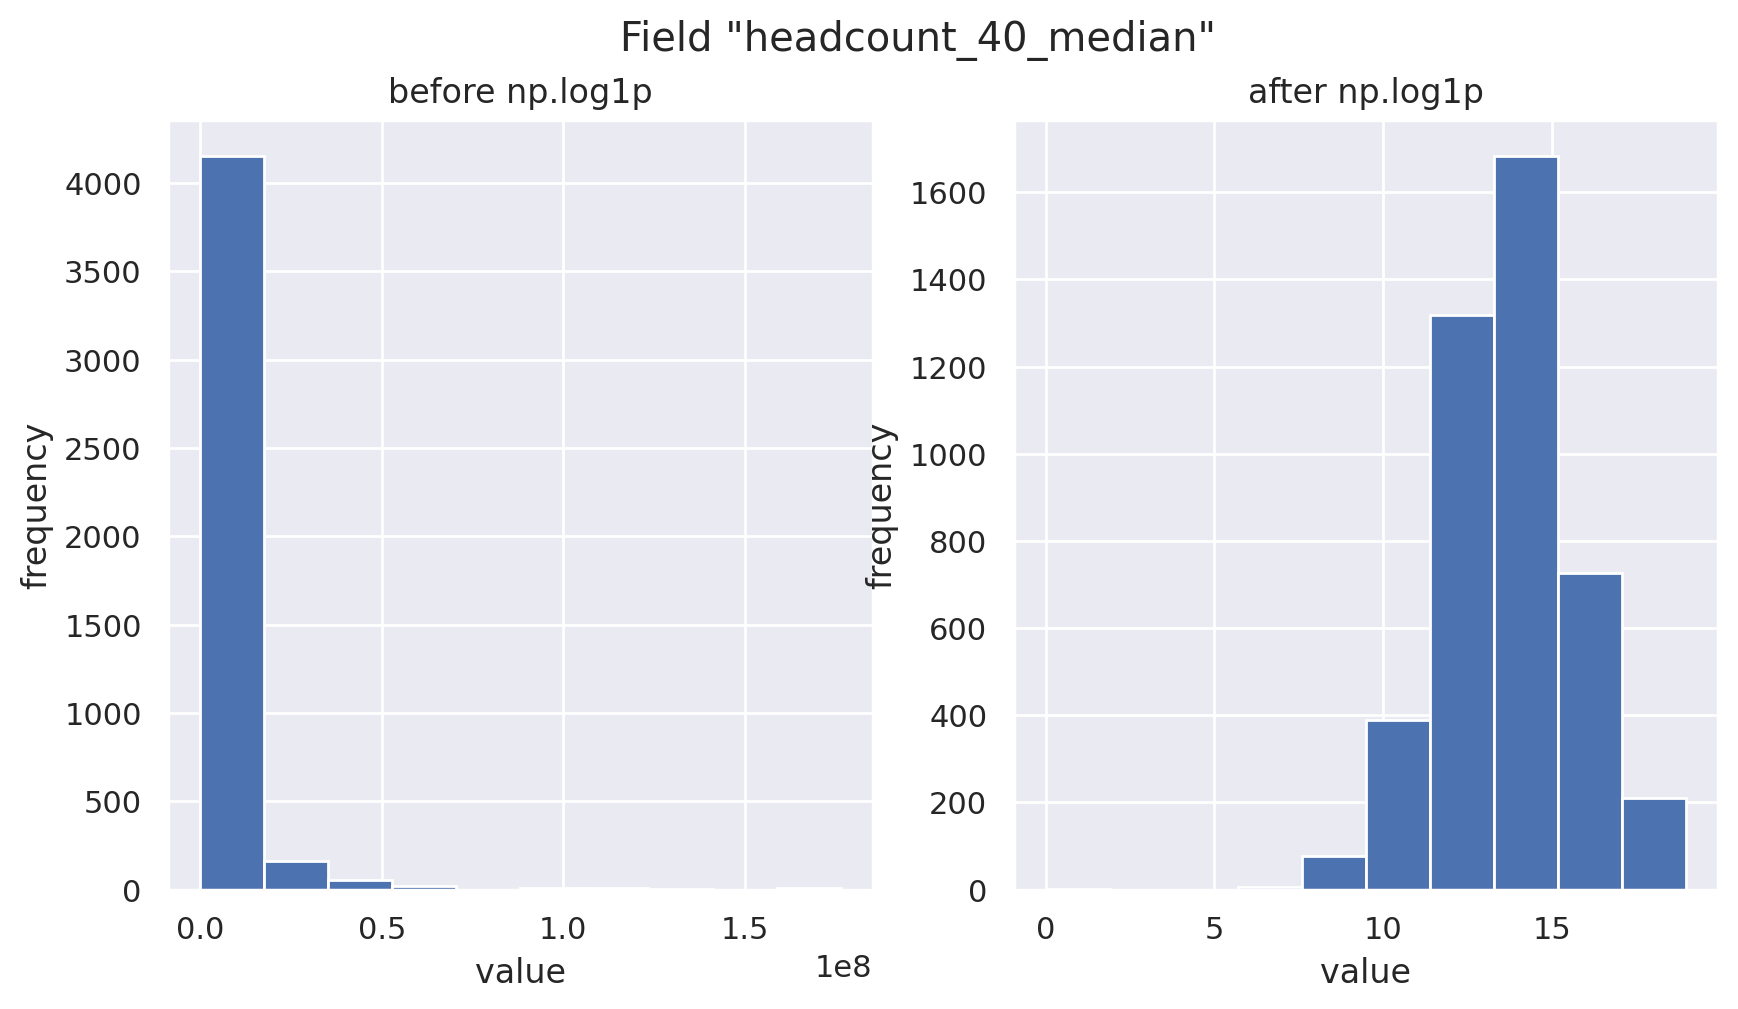

In [ ]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.
import matplotlib.pyplot as plt
# Choose a field
field = "headcount_40_median"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [ ]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    if col == "headcount_ratio_lower_mid_income_povline":
        continue
    df[col] = df[col].apply(np.log1p)


In [ ]:
df.isnull().sum().sort_values()
df.columns

Index(['year', 'ppp_version', 'survey_year', 'survey_comparability',
       'headcount_ratio_international_povline',
       'headcount_ratio_lower_mid_income_povline',
       'headcount_ratio_upper_mid_income_povline', 'headcount_ratio_100',
       'headcount_ratio_1000', 'headcount_ratio_2000',
       ...
       'country_Vanuatu', 'country_Venezuela', 'country_Vietnam',
       'country_World', 'country_Yemen', 'country_Zambia', 'country_Zimbabwe',
       'reporting_level_rural', 'reporting_level_urban',
       'welfare_type_income'],
      dtype='object', length=284)

In [ ]:
smaller_df= df.loc[:,['year', 'ppp_version',
       'survey_year', 'survey_comparability',
       'headcount_ratio_international_povline',
       'headcount_ratio_lower_mid_income_povline',
       'headcount_ratio_upper_mid_income_povline','headcount_ratio_100',
       'headcount_ratio_1000','reporting_level_rural', 'reporting_level_urban',
       'welfare_type_income']]
smaller_df.describe().T
smaller_df = smaller_df.fillna(0)

In [ ]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor='none'))

In [ ]:
X = smaller_df.loc[:,['year', 'ppp_version',
       'survey_year', 'survey_comparability',
       'headcount_ratio_international_povline',
       'headcount_ratio_upper_mid_income_povline','headcount_ratio_100',
       'headcount_ratio_1000','reporting_level_rural', 'reporting_level_urban',
       'welfare_type_income']]

y = smaller_df['headcount_ratio_lower_mid_income_povline']
X.info

<bound method DataFrame.info of       year  ppp_version  survey_year  survey_comparability  \
0     1996         2011       1996.0              0.000000   
1     2002         2011       2002.0              0.693147   
2     2005         2011       2005.0              0.693147   
3     2008         2011       2008.0              0.693147   
4     2012         2011       2012.0              0.693147   
...    ...          ...          ...                   ...   
4872  2010         2017       2010.0              1.609438   
4873  2015         2017       2015.0              1.609438   
4874  2011         2017       2011.0              0.000000   
4875  2017         2017       2017.0              0.000000   
4876  2019         2017       2019.0              0.000000   

      headcount_ratio_international_povline  \
0                                  0.652674   
1                                  0.944234   
2                                  0.620860   
3                                  

Create a copy of the data to run appropriate transformations on each feature

In [ ]:
X2 = X.copy()

X2['international'] = X2['headcount_ratio_international_povline'] ** 2
X2['upper'] = X2['headcount_ratio_upper_mid_income_povline'] ** 2

In [ ]:
X3 = X2.copy()

# multiplicative interaction
X3['OQ_x_YB'] = X3['headcount_ratio_1000'] * X3['reporting_level_rural']

# division interaction
X3['OQ_/_LA'] = X3['headcount_ratio_1000'] / X3['welfare_type_income']

In [ ]:
df['survey_comparability'].value_counts()
pd.get_dummies(df['survey_comparability'], drop_first=True).head()

0.693147    1322
0.000000    1035
1.098612     972
1.386294     624
1.791759     224
1.609438     216
1.945910      18
Name: survey_comparability, dtype: int64

In [ ]:
year_counts = df.year.value_counts()

In [ ]:
other_years=list(year_counts[year_counts <= 10].index)
other_years
X4 = X3.copy()
X4['year'] = df['year'].replace(other_years, 'Other')

More complex feature transformation(finding the std dev of the an entry of a particular column compared to the mean, as another column)

In [ ]:
def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature  

In [ ]:
X5 = X4.copy()
X5['year'] = X3['year']
add_deviation_feature(X5, 'year', 'headcount_ratio_upper_mid_income_povline')
add_deviation_feature(X5, 'year', 'headcount_ratio_international_povline')

Polynomial Features in Scikit-Learn(parameters increase as polynomial interaction between the 2 fields for better learning)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#Instantiate and provide desired degree; 
#Degree=2 also includes intercept, degree 1 terms, and cross-terms

pf = PolynomialFeatures(degree=2)
features = ['headcount_ratio_international_povline', 'headcount_ratio_upper_mid_income_povline']
pf.fit(df[features])
# pf.get_feature_names()
# feat_array = pf.transform(df[features])
# pd.DataFrame(feat_array, columns = pf.get_feature_names(input_features=features))

PolynomialFeatures()